# Deteksi Katarak Menggunakan CNN pada Citra Mata

**Nama:** Muhammad Fauzi Ardiansyah  
**Nim:**  A11.2022.14711          
**Kelompok:** [Institusi Anda]  
**Tanggal:** [Tanggal]

## Ringkasan dan Permasalahan Project

### Ringkasan:
Proyek ini bertujuan untuk mendeteksi katarak pada citra mata menggunakan Convolutional Neural Network (CNN). Dengan menggunakan dataset gambar mata yang terbagi menjadi dua kelas (normal dan katarak), model ini akan belajar membedakan antara gambar mata normal dan gambar mata yang terkena katarak.

### Permasalahan:
Katarak adalah penyakit mata yang umum yang menyebabkan penurunan penglihatan. Deteksi dini katarak sangat penting untuk mencegah kerusakan lebih lanjut pada mata. Proyek ini bertujuan untuk mengembangkan model yang dapat mendeteksi katarak secara otomatis dari gambar mata.

### Tujuan yang akan dicapai:
- Mengembangkan model CNN untuk mendeteksi katarak pada citra mata.
- Mengevaluasi performa model menggunakan metrik seperti akurasi dan loss.
- Meningkatkan akurasi model dengan augmentasi data dan teknik regularisasi.

### Model / Alur Penyelesaian:
![Alur Penyelesaian](activityml.png)
## Penjelasan Dataset, EDA dan Proses Features Dataset

### Penjelasan Dataset:
Dataset terdiri dari dua kelas: normal dan katarak. Setiap kelas berisi gambar mata yang diambil dalam kondisi yang berbeda. Dataset ini dibagi menjadi set pelatihan dan set pengujian.

### EDA (Exploratory Data Analysis):
- Menghitung jumlah gambar dalam setiap kelas.
- Menampilkan contoh gambar dari setiap kelas.
- Membuat scatter plot untuk ukuran gambar.

### Proses Features Dataset:
- Normalisasi gambar.
- Augmentasi data untuk meningkatkan keragaman dataset.



### Proses Learning / Modeling:
- Menggunakan CNN untuk memproses gambar.
- Model terdiri dari beberapa lapisan konvolusi, pooling, batch normalization, dan dropout.
- Melatih model dengan menggunakan ImageDataGenerator untuk augmentasi data.

## Performa Model

### Performa Model:
- Evaluasi model menggunakan set pengujian.
- Metrik yang digunakan: akurasi, loss, dan lain-lain.
- Plot hasil pelatihan dan validasi.

## Diskusi Hasil dan Kesimpulan

### Diskusi Hasil dan Kesimpulan:
- Diskusikan hasil evaluasi model.
- Kesimpulan dari hasil yang diperoleh.
- Rekomendasi untuk penelitian lebih lanjut.


In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout


## **Baca Dataset**




In [ ]:
# Path ke folder dataset
my_data_dir = '/content/drive/My Drive/Colab Notebooks/deteksi_katarak/deteksi/'  # Ganti dengan path dataset Anda
train_path = os.path.join(my_data_dir, 'train')
test_path = os.path.join(my_data_dir, 'test')

plant_types = ["normal", "cataract"]

In [ ]:
# EDA (Exploratory Data Analysis)
def count_images_in_directory(path, plant_types):
    total_images = 0
    for plant_type in plant_types:
        file_list = os.listdir(os.path.join(path, plant_type))
        print(f"Number of {plant_type} images:", len(file_list))
        total_images += len(file_list)
    print("Total images:", total_images)

count_images_in_directory(train_path, plant_types)
count_images_in_directory(test_path, plant_types)


Number of normal images: 246
Number of cataract images: 245
Total images: 491
Number of normal images: 60
Number of cataract images: 61
Total images: 121


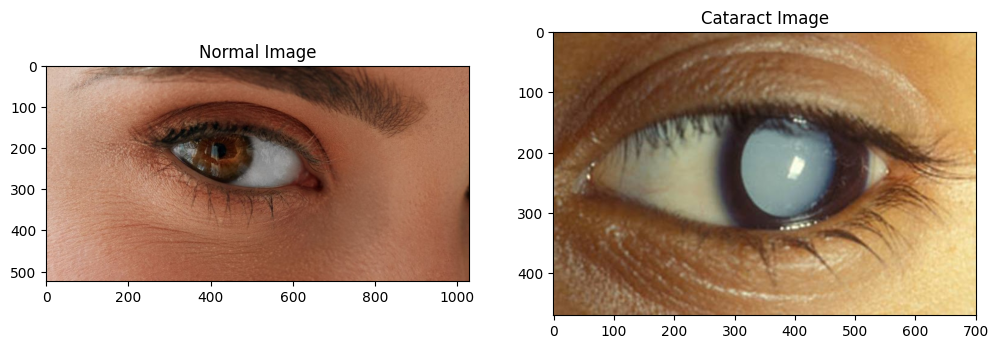

Normal image shape: (524, 1029, 3)
Cataract image shape: (470, 701, 3)


In [ ]:
#memuat gambar dan menampilkannya
path1 = os.path.join(train_path, 'normal', 'image_50.png')
path2 = os.path.join(train_path, 'cataract', 'image_23.png')

normal_img = imread(path1)
cataract_img = imread(path2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Normal Image")
plt.imshow(normal_img)
plt.subplot(1, 2, 2)
plt.title("Cataract Image")
plt.imshow(cataract_img)
plt.show()

print("Normal image shape:", normal_img.shape)
print("Cataract image shape:", cataract_img.shape)


Mean dimensions for normal: (406.5081300813008, 594.1422764227642)
Mean dimensions for cataract: (606.1183673469387, 925.3591836734694)


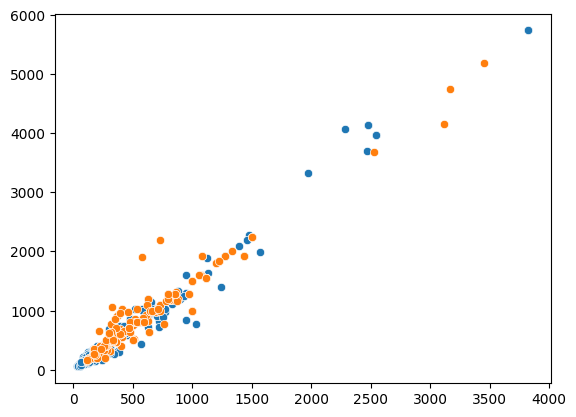

In [ ]:
#  Scatter plot ukuran gambar
def plot_image_sizes(path, plant_type):
    x, y = [], []
    for image in os.listdir(os.path.join(path, plant_type)):
        img = imread(os.path.join(path, plant_type, image))
        d1, d2, colors = img.shape
        x.append(d1)
        y.append(d2)
    sns.scatterplot(x=x, y=y)
    print(f"Mean dimensions for {plant_type}: ({np.mean(x)}, {np.mean(y)})")

plot_image_sizes(train_path, 'normal')
plot_image_sizes(train_path, 'cataract')


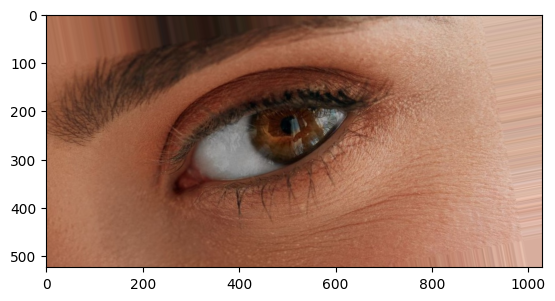

In [ ]:
# Setup ImageDataGenerator
image_shape = (500, 800, 3)
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest',
                               rescale=1./255)  # Normalisasi

plt.imshow(image_gen.random_transform(normal_img))
plt.show()

In [ ]:
# Membuat generator untuk train dan test
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='binary')

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)


Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [ ]:
# Definisi model
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 798, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 249, 399, 16)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 249, 399, 16)      64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 249, 399, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 397, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 123, 198, 32)      0

In [ ]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# Training model
results = model.fit(train_image_gen, epochs=30,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/30
16/16 [==============================] - 380s 23s/step - loss: 1.0760 - accuracy: 0.6273 - val_loss: 0.8149 - val_accuracy: 0.4959
Epoch 2/30
16/16 [==============================] - 314s 19s/step - loss: 0.5724 - accuracy: 0.7312 - val_loss: 0.7753 - val_accuracy: 0.4959
Epoch 3/30
16/16 [==============================] - 300s 18s/step - loss: 0.4277 - accuracy: 0.8086 - val_loss: 0.8949 - val_accuracy: 0.4959
Epoch 4/30
16/16 [==============================] - 310s 19s/step - loss: 0.4073 - accuracy: 0.8289 - val_loss: 1.1804 - val_accuracy: 0.4959
Epoch 5/30
16/16 [==============================] - 300s 18s/step - loss: 0.3455 - accuracy: 0.8717 - val_loss: 1.2213 - val_accuracy: 0.4959
Epoch 6/30
16/16 [==============================] - 321s 20s/step - loss: 0.3156 - accuracy: 0.8554 - val_loss: 1.5724 - val_accuracy: 0.4959
Epoch 7/30
16/16 [==============================] - 312s 19s/step - loss: 0.3251 - accuracy: 0.8697 - val_loss: 1.5528 - val_accuracy: 0.4959
Epoch 

##Callbacks

### EarlyStopping dan ModelCheckpoint untuk menghentikan pelatihan lebih awal jika model tidak membaik dan untuk menyimpan model terbaik.



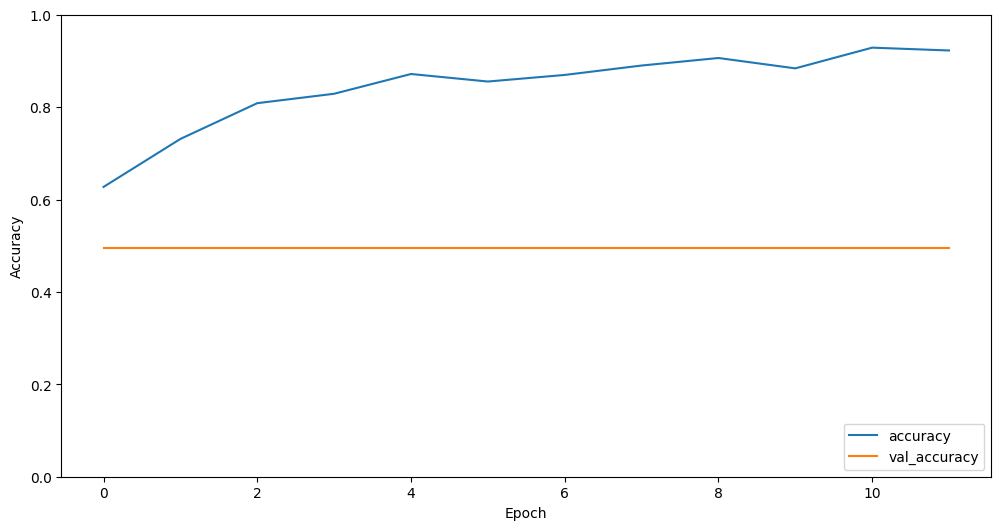

In [ ]:
# Plotting training results
plt.figure(figsize=(12, 6))
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Import Libraries untuk Prediksi
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
# Fungsi untuk Memuat dan Memproses Gambar
def load_and_preprocess_image(img_path, target_size=(500, 800)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array = img_array / 255.0  # Normalisasi
    return img_array



In [ ]:
# Memuat Gambar untuk Dites
img_path = '/content/drive/My Drive/Colab Notebooks/deteksi_katarak/deteksi/test/cataract/image_255.png'
processed_img = load_and_preprocess_image(img_path)

In [ ]:
# Melakukan Prediksi dengan Model
prediction = model.predict(processed_img)
prediction_class = (prediction > 0.5).astype("int32")[0][0]


1/1 [==============================] - 1s 518ms/step


Prediksi: Cataract


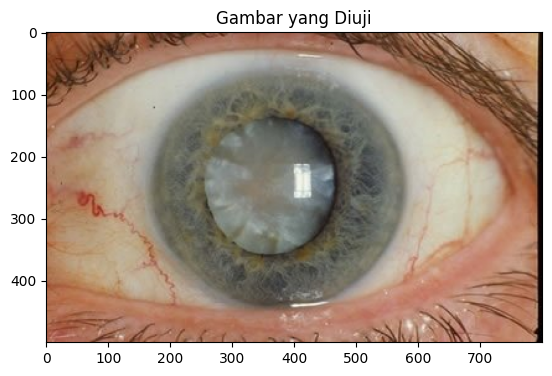

In [ ]:
#  Menampilkan Hasil Prediksi
if prediction_class == 0:
    print("Prediksi: Normal")
else:
    print("Prediksi: Cataract")

# Tampilkan Gambar yang Diuji
plt.imshow(image.load_img(img_path, target_size=(500, 800)))
plt.title("Gambar yang Diuji")
plt.show()